# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [86]:
train, test = keras.datasets.cifar10.load_data()

In [87]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [88]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [60]:
lisst=[1,2,3,5]
op=[sum,len]
for i in range(2):
    print(op[i](lisst))

11
4


In [89]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [53]:
#SGD
#RMSprop
#AdaGrad
#Adam


In [90]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
opt=[ keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adam,keras.optimizers.Adagrad]


In [91]:
results = {}
for opt in opt:
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if opt==keras.optimizers.SGD:
            optimizer =opt(lr=lr, nesterov=True, momentum=MOMENTUM)
            opt_name='SGD'
        elif opt==keras.optimizers.RMSprop:
            optimizer =opt(lr=lr, epsilon=None, decay=0.0)
            opt_name='RMSprop'
        elif opt==keras.optimizers.Adam:
            optimizer =opt(lr=lr, epsilon=None, decay=0.0)
            opt_name='Adam'
        elif opt==keras.optimizers.Adagrad:
            optimizer =opt(lr=lr, epsilon=None, decay=0.0)
            opt_name='Adagrad'
        
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        
        print(opt,lr)
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-opt-%s-lr-%s" % (str(opt_name),str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-accuracy': train_acc,
                                 'valid-accuracy': valid_acc}

Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'> 0.1
Epoch 1/

196/196 [==============================] - 7s 33ms/step - loss: 0.3780 - accuracy: 0.8649 - val_loss: 2.2274 - val_accuracy: 0.5269
Epoch 50/50
196/196 [==============================] - 6s 30ms/step - loss: 0.3627 - accuracy: 0.8710 - val_loss: 2.3787 - val_accuracy: 0.5211
Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dens

196/196 [==============================] - 5s 28ms/step - loss: 1.5697 - accuracy: 0.4541 - val_loss: 1.5832 - val_accuracy: 0.4472
Epoch 48/50
196/196 [==============================] - 5s 27ms/step - loss: 1.5655 - accuracy: 0.4541 - val_loss: 1.5779 - val_accuracy: 0.4465
Epoch 49/50
196/196 [==============================] - 5s 28ms/step - loss: 1.5614 - accuracy: 0.4563 - val_loss: 1.5736 - val_accuracy: 0.4509
Epoch 50/50
196/196 [==============================] - 7s 33ms/step - loss: 1.5575 - accuracy: 0.4574 - val_loss: 1.5713 - val_accuracy: 0.4508
Experiment with LR = 0.000010
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________________________________________________

196/196 [==============================] - 8s 41ms/step - loss: 2.3074 - accuracy: 0.1017 - val_loss: 2.3104 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 8s 41ms/step - loss: 2.3076 - accuracy: 0.1018 - val_loss: 2.3156 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 9s 44ms/step - loss: 2.3082 - accuracy: 0.0998 - val_loss: 2.3222 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 8s 43ms/step - loss: 2.3082 - accuracy: 0.0977 - val_loss: 2.3130 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 8s 43ms/step - loss: 2.3075 - accuracy: 0.1038 - val_loss: 2.3158 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 9s 44ms/step - loss: 2.3083 - accuracy: 0.0995 - val_loss: 2.3231 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 O

196/196 [==============================] - 10s 49ms/step - loss: 0.8516 - accuracy: 0.6944 - val_loss: 1.7173 - val_accuracy: 0.4983
Epoch 44/50
196/196 [==============================] - 9s 47ms/step - loss: 0.8367 - accuracy: 0.6983 - val_loss: 1.8729 - val_accuracy: 0.4656
Epoch 45/50
196/196 [==============================] - 9s 47ms/step - loss: 0.8253 - accuracy: 0.7022 - val_loss: 1.9826 - val_accuracy: 0.4523
Epoch 46/50
196/196 [==============================] - 9s 47ms/step - loss: 0.8153 - accuracy: 0.7085 - val_loss: 1.8465 - val_accuracy: 0.4910
Epoch 47/50
196/196 [==============================] - 9s 46ms/step - loss: 0.8025 - accuracy: 0.7123 - val_loss: 1.8516 - val_accuracy: 0.4850
Epoch 48/50
196/196 [==============================] - 10s 51ms/step - loss: 0.7895 - accuracy: 0.7168 - val_loss: 2.0118 - val_accuracy: 0.4789
Epoch 49/50
196/196 [==============================] - 9s 45ms/step - loss: 0.7775 - accuracy: 0.7191 - val_loss: 1.9284 - val_accuracy: 0.5007
Ep

196/196 [==============================] - 8s 41ms/step - loss: 1.4343 - accuracy: 0.5029 - val_loss: 1.4990 - val_accuracy: 0.4716
Epoch 42/50
196/196 [==============================] - 8s 42ms/step - loss: 1.4294 - accuracy: 0.5057 - val_loss: 1.4833 - val_accuracy: 0.4766
Epoch 43/50
196/196 [==============================] - 8s 42ms/step - loss: 1.4244 - accuracy: 0.5072 - val_loss: 1.4888 - val_accuracy: 0.4723
Epoch 44/50
196/196 [==============================] - 8s 42ms/step - loss: 1.4198 - accuracy: 0.5086 - val_loss: 1.4842 - val_accuracy: 0.4772
Epoch 45/50
196/196 [==============================] - 9s 44ms/step - loss: 1.4153 - accuracy: 0.5098 - val_loss: 1.4734 - val_accuracy: 0.4837
Epoch 46/50
196/196 [==============================] - 8s 42ms/step - loss: 1.4105 - accuracy: 0.5117 - val_loss: 1.4688 - val_accuracy: 0.4808
Epoch 47/50
196/196 [==============================] - 8s 43ms/step - loss: 1.4062 - accuracy: 0.5133 - val_loss: 1.4671 - val_accuracy: 0.4877
Epoc

196/196 [==============================] - 6s 30ms/step - loss: 1.4873 - accuracy: 0.4677 - val_loss: 1.6153 - val_accuracy: 0.4274
Epoch 40/50
196/196 [==============================] - 6s 31ms/step - loss: 1.4853 - accuracy: 0.4674 - val_loss: 1.5765 - val_accuracy: 0.4411
Epoch 41/50
196/196 [==============================] - 6s 29ms/step - loss: 1.4853 - accuracy: 0.4676 - val_loss: 1.5729 - val_accuracy: 0.4365
Epoch 42/50
196/196 [==============================] - 6s 30ms/step - loss: 1.4986 - accuracy: 0.4634 - val_loss: 1.5533 - val_accuracy: 0.4461
Epoch 43/50
196/196 [==============================] - 6s 29ms/step - loss: 1.4792 - accuracy: 0.4716 - val_loss: 1.5812 - val_accuracy: 0.4338
Epoch 44/50
196/196 [==============================] - 6s 29ms/step - loss: 1.4830 - accuracy: 0.4676 - val_loss: 1.5707 - val_accuracy: 0.4440
Epoch 45/50
196/196 [==============================] - 6s 29ms/step - loss: 1.4866 - accuracy: 0.4666 - val_loss: 1.5805 - val_accuracy: 0.4424
Epoc

196/196 [==============================] - 6s 31ms/step - loss: 0.9605 - accuracy: 0.6680 - val_loss: 1.3483 - val_accuracy: 0.5364
Epoch 38/50
196/196 [==============================] - 6s 30ms/step - loss: 0.9520 - accuracy: 0.6693 - val_loss: 1.3366 - val_accuracy: 0.5403
Epoch 39/50
196/196 [==============================] - 6s 29ms/step - loss: 0.9442 - accuracy: 0.6731 - val_loss: 1.3314 - val_accuracy: 0.5427
Epoch 40/50
196/196 [==============================] - 6s 29ms/step - loss: 0.9245 - accuracy: 0.6803 - val_loss: 1.3290 - val_accuracy: 0.5383
Epoch 41/50
196/196 [==============================] - 6s 29ms/step - loss: 0.9125 - accuracy: 0.6836 - val_loss: 1.3321 - val_accuracy: 0.5433
Epoch 42/50
196/196 [==============================] - 6s 30ms/step - loss: 0.8982 - accuracy: 0.6882 - val_loss: 1.3321 - val_accuracy: 0.5407
Epoch 43/50
196/196 [==============================] - 6s 30ms/step - loss: 0.8865 - accuracy: 0.6959 - val_loss: 1.3408 - val_accuracy: 0.5421
Epoc

196/196 [==============================] - 6s 28ms/step - loss: 1.0828 - accuracy: 0.6117 - val_loss: 1.6993 - val_accuracy: 0.4545
Epoch 36/50
196/196 [==============================] - 6s 28ms/step - loss: 1.0652 - accuracy: 0.6189 - val_loss: 1.5134 - val_accuracy: 0.4938
Epoch 37/50
196/196 [==============================] - 6s 29ms/step - loss: 1.0540 - accuracy: 0.6245 - val_loss: 1.5318 - val_accuracy: 0.4853
Epoch 38/50
196/196 [==============================] - 5s 27ms/step - loss: 1.0337 - accuracy: 0.6312 - val_loss: 2.0555 - val_accuracy: 0.4054
Epoch 39/50
196/196 [==============================] - 5s 27ms/step - loss: 1.0244 - accuracy: 0.6365 - val_loss: 1.6434 - val_accuracy: 0.4608
Epoch 40/50
196/196 [==============================] - 5s 28ms/step - loss: 0.9984 - accuracy: 0.6430 - val_loss: 1.5840 - val_accuracy: 0.4806
Epoch 41/50
196/196 [==============================] - 6s 29ms/step - loss: 0.9820 - accuracy: 0.6492 - val_loss: 1.8422 - val_accuracy: 0.4196
Epoc

196/196 [==============================] - 6s 30ms/step - loss: 1.5941 - accuracy: 0.4483 - val_loss: 1.6175 - val_accuracy: 0.4356
Epoch 34/50
196/196 [==============================] - 6s 28ms/step - loss: 1.5895 - accuracy: 0.4494 - val_loss: 1.5998 - val_accuracy: 0.4413
Epoch 35/50
196/196 [==============================] - 6s 28ms/step - loss: 1.5845 - accuracy: 0.4506 - val_loss: 1.5980 - val_accuracy: 0.4389
Epoch 36/50
196/196 [==============================] - 6s 29ms/step - loss: 1.5795 - accuracy: 0.4525 - val_loss: 1.5927 - val_accuracy: 0.4449
Epoch 37/50
196/196 [==============================] - 6s 29ms/step - loss: 1.5742 - accuracy: 0.4543 - val_loss: 1.5929 - val_accuracy: 0.4465
Epoch 38/50
196/196 [==============================] - 5s 27ms/step - loss: 1.5697 - accuracy: 0.4566 - val_loss: 1.5841 - val_accuracy: 0.4478
Epoch 39/50
196/196 [==============================] - 5s 27ms/step - loss: 1.5650 - accuracy: 0.4584 - val_loss: 1.5776 - val_accuracy: 0.4480
Epoc

196/196 [==============================] - 5s 28ms/step - loss: 2.2095 - accuracy: 0.2081 - val_loss: 2.2082 - val_accuracy: 0.2114
Epoch 32/50
196/196 [==============================] - 5s 28ms/step - loss: 2.2075 - accuracy: 0.2100 - val_loss: 2.2062 - val_accuracy: 0.2140
Epoch 33/50
196/196 [==============================] - 6s 30ms/step - loss: 2.2055 - accuracy: 0.2119 - val_loss: 2.2042 - val_accuracy: 0.2172
Epoch 34/50
196/196 [==============================] - 5s 28ms/step - loss: 2.2035 - accuracy: 0.2139 - val_loss: 2.2023 - val_accuracy: 0.2197
Epoch 35/50
196/196 [==============================] - 6s 28ms/step - loss: 2.2016 - accuracy: 0.2155 - val_loss: 2.2003 - val_accuracy: 0.2207
Epoch 36/50
196/196 [==============================] - 5s 28ms/step - loss: 2.1997 - accuracy: 0.2170 - val_loss: 2.1984 - val_accuracy: 0.2221
Epoch 37/50
196/196 [==============================] - 6s 30ms/step - loss: 2.1978 - accuracy: 0.2197 - val_loss: 2.1966 - val_accuracy: 0.2239
Epoc

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    print(i,cond)

0 exp-opt-SGD-lr-0.1
1 exp-opt-SGD-lr-0.01
2 exp-opt-SGD-lr-0.001
3 exp-opt-SGD-lr-0.0001
4 exp-opt-SGD-lr-1e-05
5 exp-opt-RMSprop-lr-0.1
6 exp-opt-RMSprop-lr-0.01
7 exp-opt-RMSprop-lr-0.001
8 exp-opt-RMSprop-lr-0.0001
9 exp-opt-RMSprop-lr-1e-05
10 exp-opt-Adam-lr-0.1
11 exp-opt-Adam-lr-0.01
12 exp-opt-Adam-lr-0.001
13 exp-opt-Adam-lr-0.0001
14 exp-opt-Adam-lr-1e-05
15 exp-opt-Adagrad-lr-0.1
16 exp-opt-Adagrad-lr-0.01
17 exp-opt-Adagrad-lr-0.001
18 exp-opt-Adagrad-lr-0.0001
19 exp-opt-Adagrad-lr-1e-05


<Figure size 576x432 with 0 Axes>

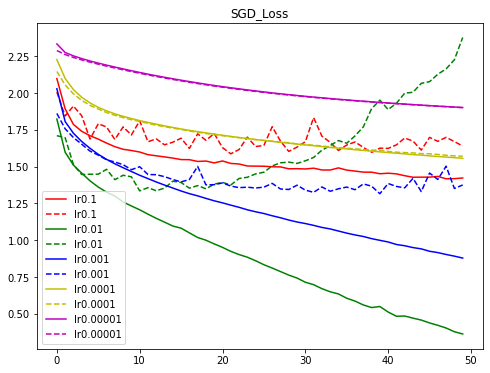

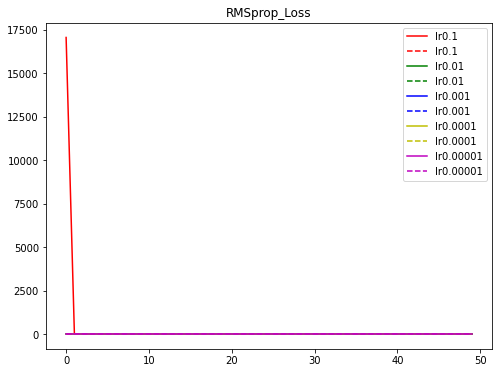

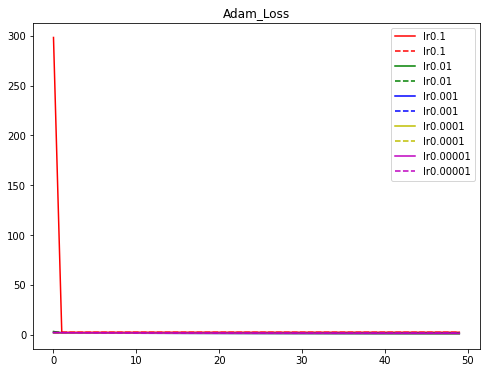

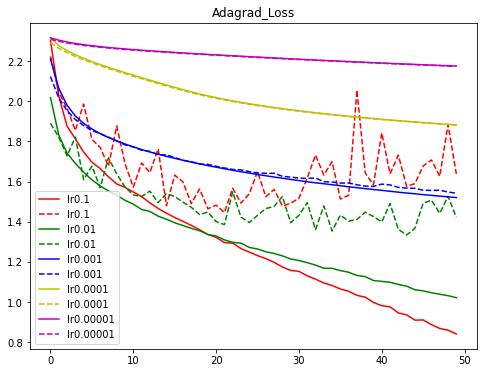

In [124]:
color_bar = ["r", "g", "b", "y", "m", "k"]

SGD={'lr0.1':results['exp-opt-SGD-lr-0.1'],'lr0.01':results['exp-opt-SGD-lr-0.01'],'lr0.001':results['exp-opt-SGD-lr-0.001'],
     'lr0.0001':results['exp-opt-SGD-lr-0.0001'],'lr0.00001':results['exp-opt-SGD-lr-1e-05']}

plt.figure(figsize=(8,6))
for i, cond in enumerate(SGD.keys()):
    plt.plot(range(len(SGD[cond]['train-loss'])),SGD[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(SGD[cond]['valid-loss'])),SGD[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("SGD_Loss")
plt.legend()
plt.show()

RMSprop={'lr0.1':results['exp-opt-RMSprop-lr-0.1'],'lr0.01':results['exp-opt-RMSprop-lr-0.01'],'lr0.001':results['exp-opt-RMSprop-lr-0.001'],
     'lr0.0001':results['exp-opt-RMSprop-lr-0.0001'],'lr0.00001':results['exp-opt-RMSprop-lr-1e-05']}

plt.figure(figsize=(8,6))
for i, cond in enumerate(RMSprop.keys()):
    plt.plot(range(len(RMSprop[cond]['train-loss'])),RMSprop[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(RMSprop[cond]['valid-loss'])),RMSprop[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("RMSprop_Loss")
plt.legend()
plt.show()

Adam={'lr0.1':results['exp-opt-Adam-lr-0.1'],'lr0.01':results['exp-opt-Adam-lr-0.01'],'lr0.001':results['exp-opt-Adam-lr-0.001'],
     'lr0.0001':results['exp-opt-Adam-lr-0.0001'],'lr0.00001':results['exp-opt-Adam-lr-1e-05']}

plt.figure(figsize=(8,6))
for i, cond in enumerate(SGD.keys()):
    plt.plot(range(len(Adam[cond]['train-loss'])),Adam[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(Adam[cond]['valid-loss'])),Adam[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Adam_Loss")
plt.legend()
plt.show()

Adagrad={'lr0.1':results['exp-opt-Adagrad-lr-0.1'],'lr0.01':results['exp-opt-Adagrad-lr-0.01'],'lr0.001':results['exp-opt-Adagrad-lr-0.001'],
     'lr0.0001':results['exp-opt-Adagrad-lr-0.0001'],'lr0.00001':results['exp-opt-Adagrad-lr-1e-05']}

plt.figure(figsize=(8,6))
for i, cond in enumerate(Adagrad.keys()):
    plt.plot(range(len(Adagrad[cond]['train-loss'])),Adagrad[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(Adagrad[cond]['valid-loss'])),Adagrad[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Adagrad_Loss")
plt.legend()
plt.show()

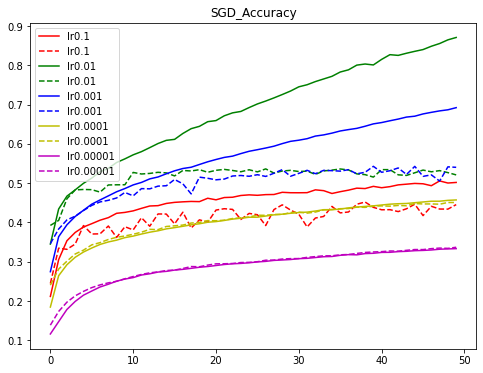

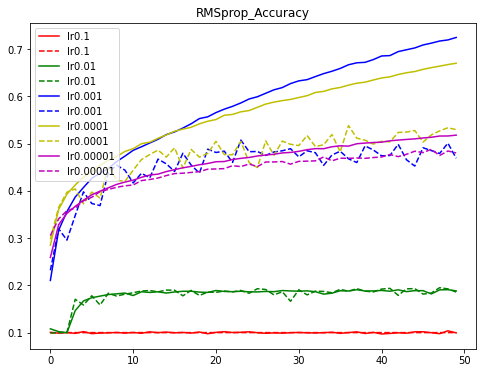

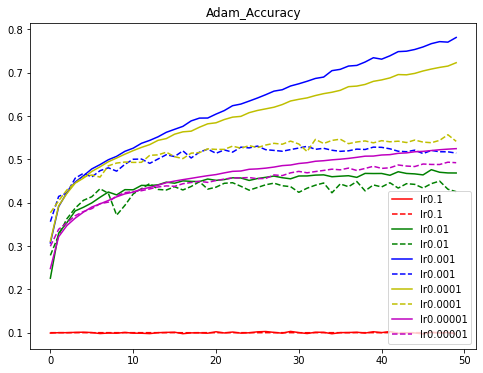

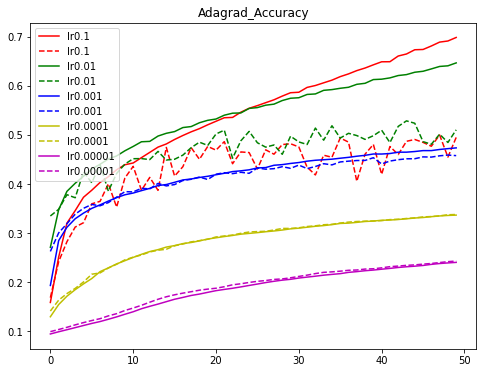

In [126]:
color_bar = ["r", "g", "b", "y", "m", "k"]

SGD={'lr0.1':results['exp-opt-SGD-lr-0.1'],'lr0.01':results['exp-opt-SGD-lr-0.01'],'lr0.001':results['exp-opt-SGD-lr-0.001'],
     'lr0.0001':results['exp-opt-SGD-lr-0.0001'],'lr0.00001':results['exp-opt-SGD-lr-1e-05']}

plt.figure(figsize=(8,6))
for i, cond in enumerate(SGD.keys()):
    plt.plot(range(len(SGD[cond]['train-accuracy'])),SGD[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(SGD[cond]['valid-accuracy'])),SGD[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("SGD_Accuracy")
plt.legend()
plt.show()

RMSprop={'lr0.1':results['exp-opt-RMSprop-lr-0.1'],'lr0.01':results['exp-opt-RMSprop-lr-0.01'],'lr0.001':results['exp-opt-RMSprop-lr-0.001'],
     'lr0.0001':results['exp-opt-RMSprop-lr-0.0001'],'lr0.00001':results['exp-opt-RMSprop-lr-1e-05']}

plt.figure(figsize=(8,6))
for i, cond in enumerate(RMSprop.keys()):
    plt.plot(range(len(RMSprop[cond]['train-accuracy'])),RMSprop[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(RMSprop[cond]['valid-accuracy'])),RMSprop[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("RMSprop_Accuracy")
plt.legend()
plt.show()

Adam={'lr0.1':results['exp-opt-Adam-lr-0.1'],'lr0.01':results['exp-opt-Adam-lr-0.01'],'lr0.001':results['exp-opt-Adam-lr-0.001'],
     'lr0.0001':results['exp-opt-Adam-lr-0.0001'],'lr0.00001':results['exp-opt-Adam-lr-1e-05']}

plt.figure(figsize=(8,6))
for i, cond in enumerate(SGD.keys()):
    plt.plot(range(len(Adam[cond]['train-accuracy'])),Adam[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(Adam[cond]['valid-accuracy'])),Adam[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Adam_Accuracy")
plt.legend()
plt.show()

Adagrad={'lr0.1':results['exp-opt-Adagrad-lr-0.1'],'lr0.01':results['exp-opt-Adagrad-lr-0.01'],'lr0.001':results['exp-opt-Adagrad-lr-0.001'],
     'lr0.0001':results['exp-opt-Adagrad-lr-0.0001'],'lr0.00001':results['exp-opt-Adagrad-lr-1e-05']}

plt.figure(figsize=(8,6))
for i, cond in enumerate(Adagrad.keys()):
    plt.plot(range(len(Adagrad[cond]['train-accuracy'])),Adagrad[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(Adagrad[cond]['valid-accuracy'])),Adagrad[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Adagrad_Accuracy")
plt.legend()
plt.show()

In [107]:
lr0_1={'SGD':results['exp-opt-SGD-lr-0.1'],'RMSprop':results['exp-opt-RMSprop-lr-0.1'],
       'Adam':results['exp-opt-Adam-lr-0.1'],'Adagrad':results['exp-opt-Adagrad-lr-0.1']}
lr0_01={'SGD':results['exp-opt-SGD-lr-0.01'],'RMSprop':results['exp-opt-RMSprop-lr-0.01'],
       'Adam':results['exp-opt-Adam-lr-0.01'],'Adagrad':results['exp-opt-Adagrad-lr-0.01']}
lr0_001={'SGD':results['exp-opt-SGD-lr-0.001'],'RMSprop':results['exp-opt-RMSprop-lr-0.001'],
       'Adam':results['exp-opt-Adam-lr-0.001'],'Adagrad':results['exp-opt-Adagrad-lr-0.001']}
lr0_0001={'SGD':results['exp-opt-SGD-lr-0.0001'],'RMSprop':results['exp-opt-RMSprop-lr-0.0001'],
       'Adam':results['exp-opt-Adam-lr-0.0001'],'Adagrad':results['exp-opt-Adagrad-lr-0.0001']}
lr0_00001={'SGD':results['exp-opt-SGD-lr-1e-05'],'RMSprop':results['exp-opt-RMSprop-lr-1e-05'],
       'Adam':results['exp-opt-Adam-lr-1e-05'],'Adagrad':results['exp-opt-Adagrad-lr-1e-05']}

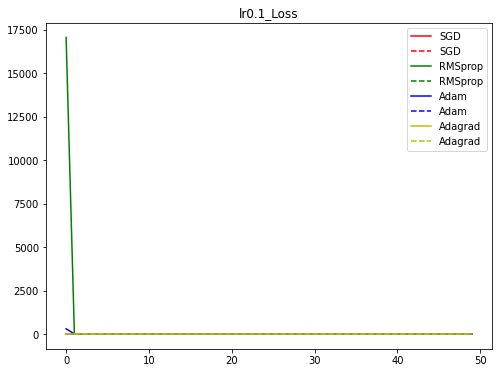

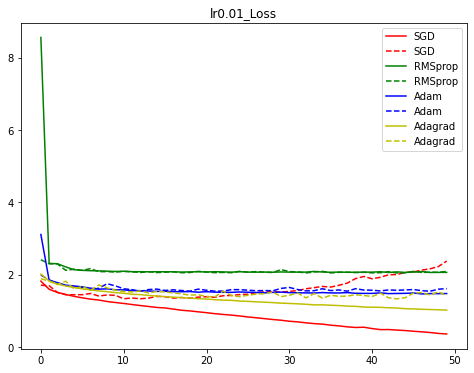

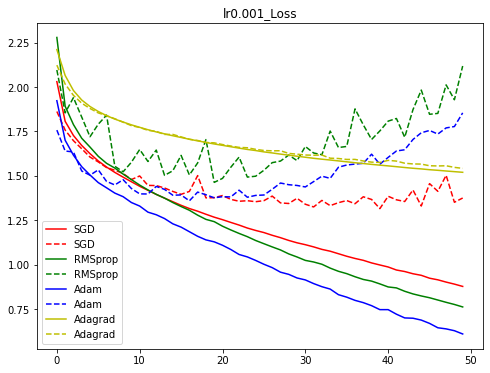

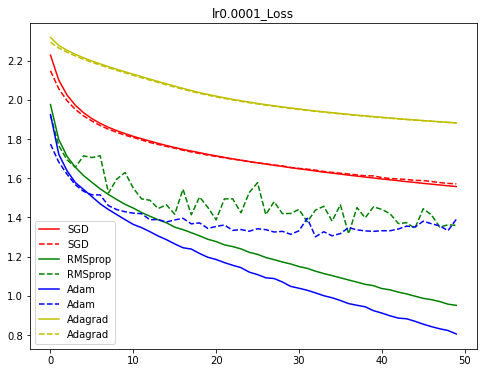

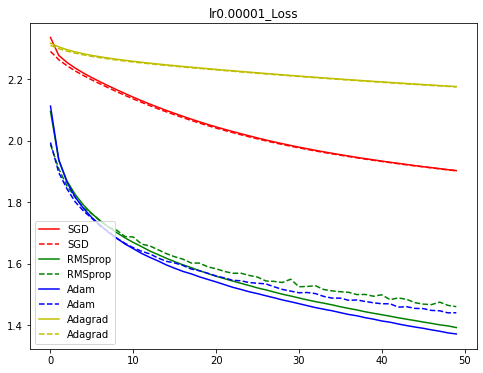

In [112]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(lr0_1.keys()):
    plt.plot(range(len(lr0_1[cond]['train-loss'])),lr0_1[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(lr0_1[cond]['valid-loss'])),lr0_1[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("lr0.1_Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(lr0_01.keys()):
    plt.plot(range(len(lr0_01[cond]['train-loss'])),lr0_01[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(lr0_01[cond]['valid-loss'])),lr0_01[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("lr0.01_Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(lr0_001.keys()):
    plt.plot(range(len(lr0_001[cond]['train-loss'])),lr0_001[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(lr0_001[cond]['valid-loss'])),lr0_001[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("lr0.001_Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(lr0_0001.keys()):
    plt.plot(range(len(lr0_0001[cond]['train-loss'])),lr0_0001[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(lr0_0001[cond]['valid-loss'])),lr0_0001[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("lr0.0001_Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(lr0_00001.keys()):
    plt.plot(range(len(lr0_00001[cond]['train-loss'])),lr0_00001[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(lr0_00001[cond]['valid-loss'])),lr0_00001[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("lr0.00001_Loss")
plt.legend()
plt.show()

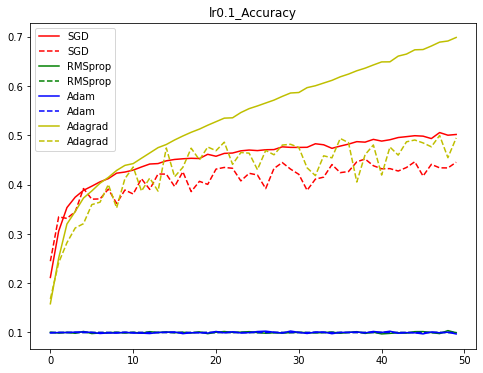

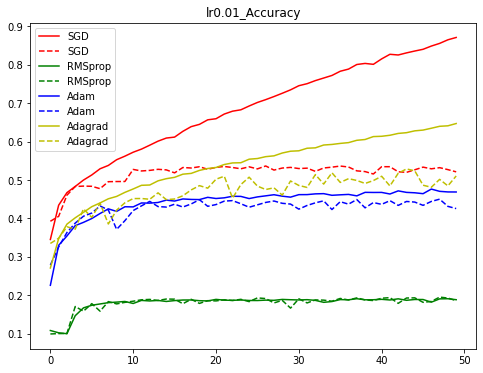

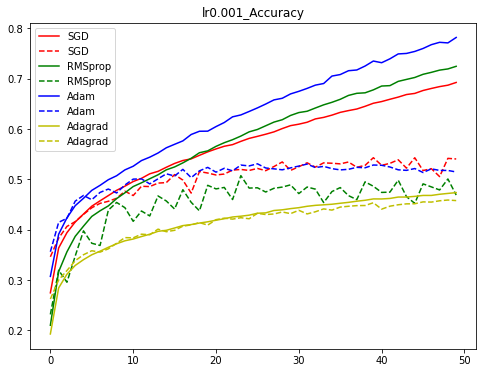

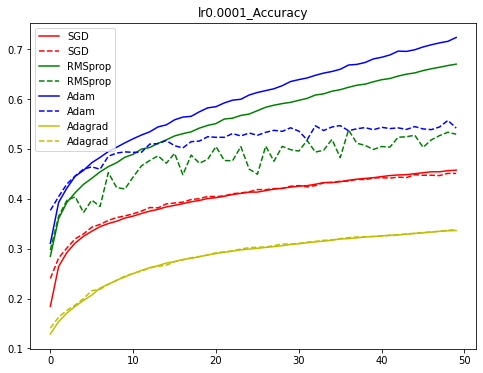

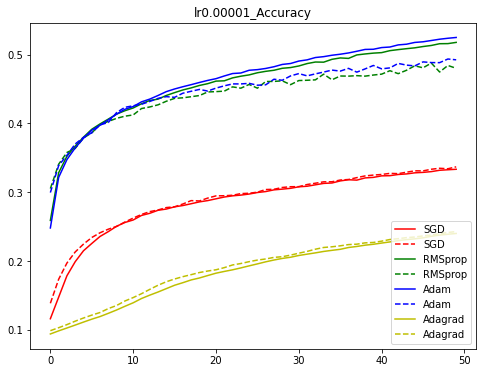

In [114]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(lr0_1.keys()):
    plt.plot(range(len(lr0_1[cond]['train-accuracy'])),lr0_1[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(lr0_1[cond]['valid-accuracy'])),lr0_1[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("lr0.1_Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(lr0_01.keys()):
    plt.plot(range(len(lr0_01[cond]['train-accuracy'])),lr0_01[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(lr0_01[cond]['valid-accuracy'])),lr0_01[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("lr0.01_Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(lr0_001.keys()):
    plt.plot(range(len(lr0_001[cond]['train-accuracy'])),lr0_001[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(lr0_001[cond]['valid-accuracy'])),lr0_001[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("lr0.001_Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(lr0_1.keys()):
    plt.plot(range(len(lr0_0001[cond]['train-accuracy'])),lr0_0001[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(lr0_0001[cond]['valid-accuracy'])),lr0_0001[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("lr0.0001_Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(lr0_00001.keys()):
    plt.plot(range(len(lr0_00001[cond]['train-accuracy'])),lr0_00001[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(lr0_00001[cond]['valid-accuracy'])),lr0_00001[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("lr0.00001_Accuracy")
plt.legend()
plt.show()